In [1]:
# Dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
%matplotlib inline
matplotlib.style.use('ggplot')

# Formatting the data
First we bring in the csv data, format it and create some calculated fields

In [2]:
#Bring in the csv file created from the Yelp reformat and convert to a dataframe
csvpath = os.path.join("Yelp_reformat.csv")
yelptest_df = pd.read_csv(csvpath, encoding="UTF-8")
yelptest_df.head()

,County,Crime Rate per 100k,Murder,Rape,Robbery,Assault,Burglary,Larceny,MV Theft,Arson,Population,Avg_Rating,Median_Rating,Avg_Price,Rest_Count,Avg_Lat,Avg_Lng,CountyName,State
0,"St. Louis city, MO",1791.995377,119,200,1778,3609,4995,13791,3543,464,318416,4.370,4.50,1.977778,50,38.626690,-90.293315,St. Louis city,MO
1,"Crittenden County, AR",1754.914968,8,38,165,662,1482,1753,189,28,49746,3.360,3.50,1.357143,50,35.169865,-90.424857,Crittenden County,AR
2,"Alexander County, IL",1664.700485,1,2,5,119,82,184,12,2,7629,4.160,4.00,1.720000,50,37.258090,-89.520924,Alexander County,IL
3,"Kenedy County, TX",1456.310680,0,3,1,2,5,4,4,0,412,3.625,3.75,1.200000,8,27.232554,-97.740608,Kenedy County,TX
4,"De Soto Parish, LA",1447.402430,3,4,17,368,149,494,60,0,27083,3.875,4.00,1.285714,16,32.065037,-93.699333,De Soto Parish,LA


In [54]:
# Create some new fields to show crime rates per 10K
yelptest_df["Murder_per_10K"] = yelptest_df["Murder"]/yelptest_df["Population"]*10000
yelptest_df["Robbery_per_10K"] = yelptest_df["Robbery"]/yelptest_df["Population"]*10000
yelptest_df["Burglary_per_10K"] = yelptest_df["Burglary"]/yelptest_df["Population"]*10000
yelptest_df["MV_Theft_per_10K"] = yelptest_df["MV Theft"]/yelptest_df["Population"]*10000
yelptest_df["Larceny_per_10K"] = yelptest_df["Larceny"]/yelptest_df["Population"]*10000
yelptest_df.head()

,County,Crime Rate per 100k,Murder,Rape,Robbery,Assault,Burglary,Larceny,MV Theft,Arson,...,Avg_Lng,CountyName,State,Murder_per_10K,Robbery_per_10K,Burglary_per_10K,MV_Theft_per_10K,rating_groups,rating_groups2,Larceny_per_10K
0,"St. Louis city, MO",1791.995377,119,200,1778,3609,4995,13791,3543,464,...,-90.293315,St. Louis city,MO,3.737249,55.838903,156.870258,111.269534,4.25-4.5,>4.25,433.112658
1,"Crittenden County, AR",1754.914968,8,38,165,662,1482,1753,189,28,...,-90.424857,Crittenden County,AR,1.608170,33.168496,297.913400,37.993004,3.25-3.5,3.25-4.0,352.390142
2,"Alexander County, IL",1664.700485,1,2,5,119,82,184,12,2,...,-89.520924,Alexander County,IL,1.310788,6.553939,107.484598,15.729453,4.0-4.25,4.0-4.25,241.184952
3,"Kenedy County, TX",1456.310680,0,3,1,2,5,4,4,0,...,-97.740608,Kenedy County,TX,0.000000,24.271845,121.359223,97.087379,3.5-3.75,3.25-4.0,97.087379
4,"De Soto Parish, LA",1447.402430,3,4,17,368,149,494,60,0,...,-93.699333,De Soto Parish,LA,1.107706,6.277000,55.016062,22.154119,3.75-4.0,3.25-4.0,182.402245


# Chai Squared Goodness of fit on the types of crime

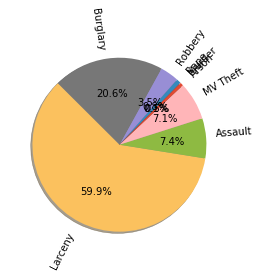

In [41]:
# First we need to determine the total of each type of crime and see view them on a pie chart

# Compare Types of Crime
murder = yelptest_df["Murder"].sum()
rape = yelptest_df["Rape"].sum()
robbery = yelptest_df["Robbery"].sum()
burglary = yelptest_df["Burglary"].sum()
larceny= yelptest_df["Larceny"].sum()
assault = yelptest_df["Assault"].sum()
mv_theft = yelptest_df["MV Theft"].sum()
arson =yelptest_df["Arson"].sum()
crime_mean = np.mean([murder, rape, robbery, burglary, larceny, assault, mv_theft, arson])

labels = 'Murder', 'Rape', 'Robbery', 'Burglary', 'Larceny','Assault', 'MV Theft', 'Arson'
sizes = [murder, rape, robbery, burglary, larceny, assault, mv_theft, arson]
explode = (0, 0, 0, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45, rotatelabels = 270)
plt.savefig("img_crime_pie.png")
plt.show()



In [21]:
# Next we run the Chai Squared Goodness of Fit

# degree of freedom is the number of catergories you have minus 1
observed = pd.Series(sizes, index=labels)
Chai_df = pd.DataFrame([observed]).T
Chai_df[1] = crime_mean
Chai_df.columns = ["observed", "expected"]
# Chai_df

# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 7)
# The critical value
print(critical_value)
# Run the chi square test with stats.chisquare()
stats.chisquare(Chai_df['observed'], Chai_df['expected'])



14.067140449340169


Power_divergenceResult(statistic=23109324.741940413, pvalue=0.0)

Since the chi square value of 23,109,324 exceeds the critical value of 14.07, 
we conclude that the results are statistically significant and (as expected based on the pie chart) we can conclude with 95% certainty that the rates of each crime are different.

# Creating groups of avg ratings data
Next we bin the avg restaurant rating into groups and use ANOVA to determine which are the same of diffent.
We found that <3.0 - 3.25 was statistically not different and 3.25 - 4.0 was also statistically the same using a p value of 0.05. 

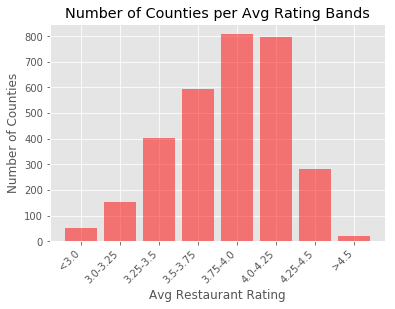

In [42]:
# Create Bins for the ranges of avg restaurant rating
bins = [0, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 5] # first is less than or equal to 60
group_names = ["<3.0", "3.0-3.25", "3.25-3.5", "3.5-3.75","3.75-4.0","4.0-4.25","4.25-4.5",">4.5"] 
yelptest_df["rating_groups"] = pd.cut(yelptest_df["Avg_Rating"], bins, labels=group_names) 

# Create a list of the counts in each group
df_rating_groups = yelptest_df.groupby("rating_groups")
rating_count = df_rating_groups["Avg_Rating"].count()

# Build a bar chart for the avg rating groups and display
x_axis = np.arange(len(group_names))
plt.bar(x_axis, rating_count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names, rotation=45, ha="right")
# Format the chart
plt.title("Number of Counties per Avg Rating Bands")
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Number of Counties")
plt.savefig("img_orig_rating_bands.png")
plt.show()

In [5]:
# Create a dictionary of groups by avg restaurant ratings and preform ANOVA on crime rate
dic = {}
groups = list (yelptest_df["rating_groups"].unique())
for grouping in groups:
    dic['{0}'.format(grouping)] = yelptest_df.loc[yelptest_df["rating_groups"]==grouping,"Crime Rate per 100k"]

print(stats.f_oneway(dic["<3.0"], dic["3.0-3.25"], dic["3.25-3.5"], dic["3.5-3.75"],dic["3.75-4.0"],dic["4.0-4.25"],dic["4.25-4.5"], dic[">4.5"]))
print(stats.f_oneway(dic["<3.0"],dic["3.0-3.25"],dic["4.25-4.5"]))
print(stats.f_oneway(dic["3.25-3.5"],dic["3.5-3.75"],dic["3.75-4.0"]))

F_onewayResult(statistic=10.112775602915402, pvalue=1.4435597466334614e-12)
F_onewayResult(statistic=1.8799613237177357, pvalue=0.153710889707327)
F_onewayResult(statistic=1.593398377555167, pvalue=0.20352013992913434)


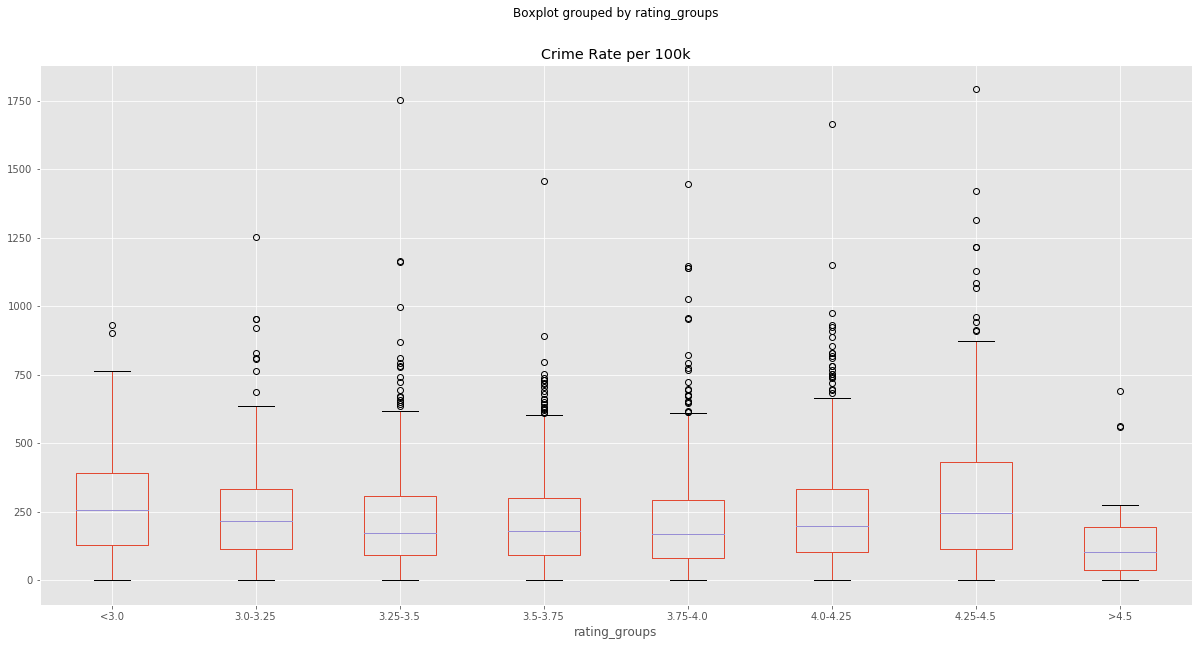

In [43]:
# Use a box polt to show crime rate by avg rating groups
yelptest_df.boxplot("Crime Rate per 100k", by="rating_groups", figsize=(20, 10))
plt.savefig("img_orig_crime_box.png")
plt.show()

# Recreating the Bines now that we know what is similar
We redid the work using the new bins and found using ANOVA that they differed (based on a p value of 0.05) which can be seen on the box chart (although the relationship isn't linear.)

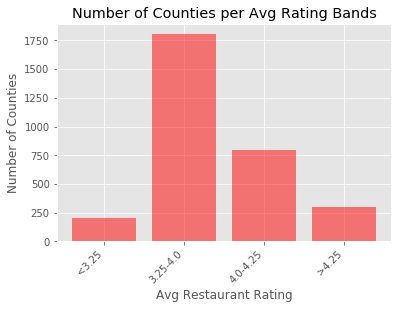

In [44]:
# Create Bins for the ranges of avg restaurant rating
bins = [0, 3.25, 4, 4.25, 5] # first is less than or equal to 60
group_names = ["<3.25", "3.25-4.0","4.0-4.25",">4.25"] 
yelptest_df["rating_groups2"] = pd.cut(yelptest_df["Avg_Rating"], bins, labels=group_names) 

# Create a list of the counts in each group
df_rating_groups = yelptest_df.groupby("rating_groups2")
rating_count = df_rating_groups["Avg_Rating"].count()

# Build a bar chart for the avg rating groups and display
x_axis = np.arange(len(group_names))
plt.bar(x_axis, rating_count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names, rotation=45, ha="right")
# Format the chart
plt.title("Number of Counties per Avg Rating Bands")
plt.xlabel("Avg Restaurant Rating")
plt.ylabel("Number of Counties")
plt.savefig("img_rev_rating_band.png")

plt.show()

In [8]:
# Create a dictionary of groups by avg restaurant ratings and preform ANOVA on crime rate
dic2 = {}
groups = list (yelptest_df["rating_groups2"].unique())
for grouping in groups:
    dic2['{0}'.format(grouping)] = yelptest_df.loc[yelptest_df["rating_groups2"]==grouping,"Crime Rate per 100k"]

print(stats.f_oneway(dic2["<3.25"], dic2["3.25-4.0"],dic2["4.0-4.25"],dic2[">4.25"]))


F_onewayResult(statistic=18.960664519676783, pvalue=3.491699496728524e-12)


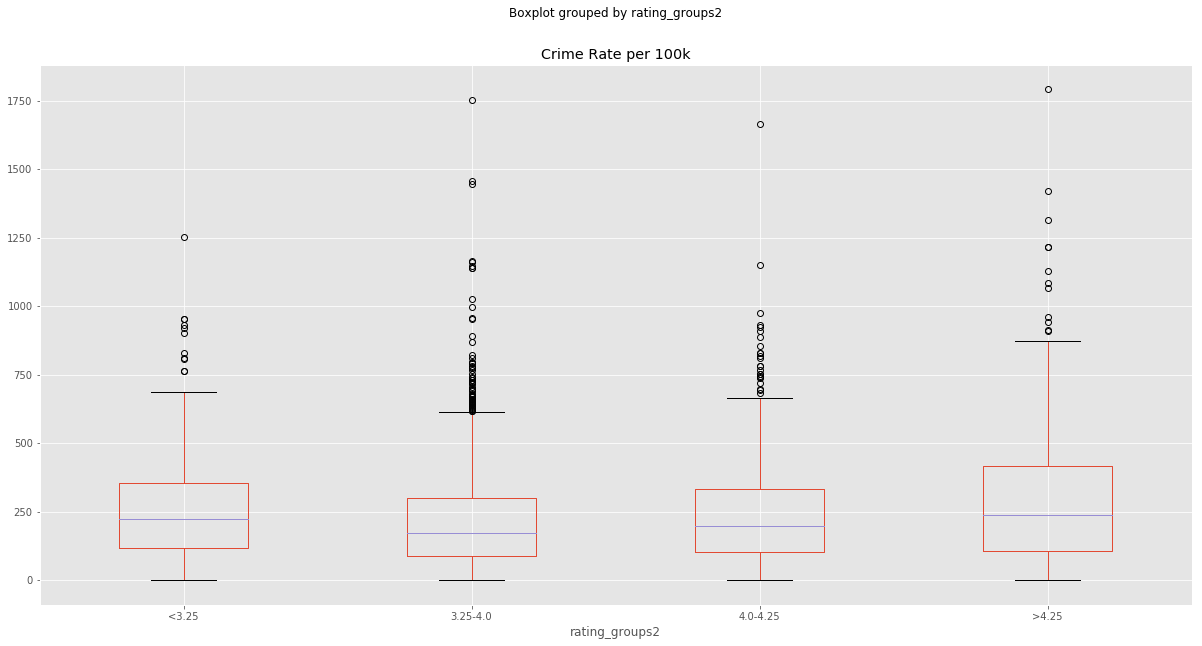

In [45]:
# Use a box polt to show crime rate by avg rating groups
yelptest_df.boxplot("Crime Rate per 100k", by="rating_groups2", figsize=(20, 10))
plt.savefig("img_rev_crime_box.png")
plt.show()

# Reviewing other relationships for these groups
Next we compared the avg group ratings to the population, and types of crimes

### Population

In [10]:
# Create a dictionary of groups by avg restaurant ratings and preform ANOVA
dic3 = {}
groups = list (yelptest_df["rating_groups2"].unique())
for grouping in groups:
    dic3['{0}'.format(grouping)] = yelptest_df.loc[yelptest_df["rating_groups2"]==grouping,"Population"]

print(stats.f_oneway(dic3["<3.25"], dic3["3.25-4.0"],dic3["4.0-4.25"],dic3[">4.25"]))


F_onewayResult(statistic=60.79102066356667, pvalue=3.467951378204408e-38)


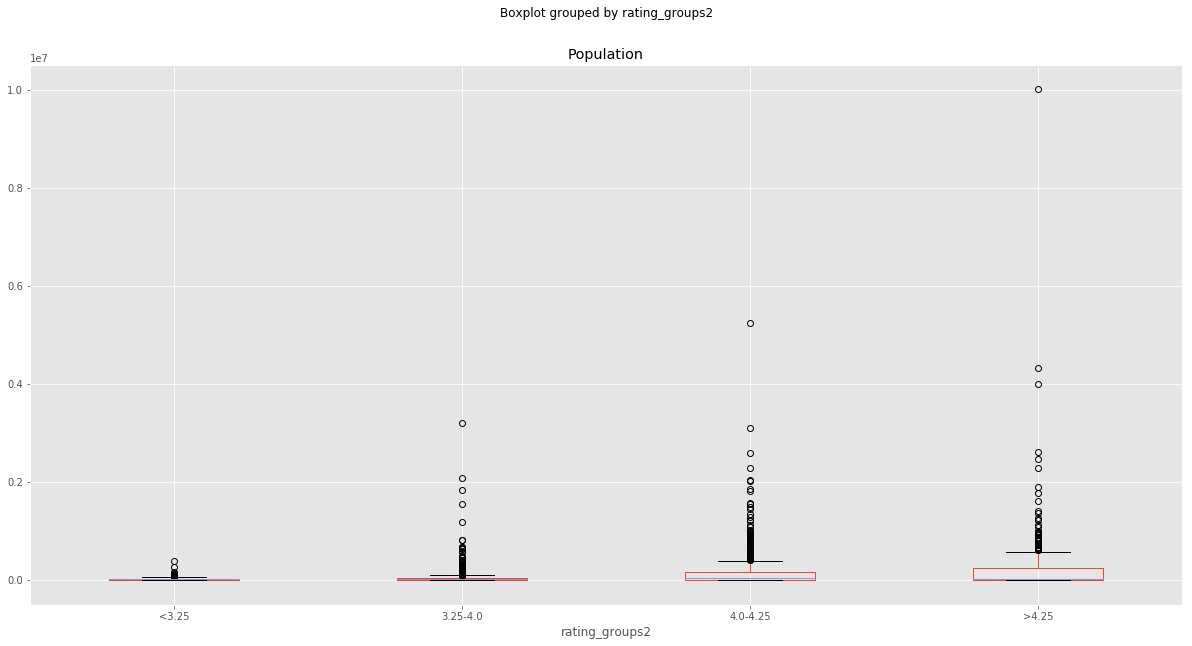

In [46]:
# Use a box polt to show crime rate by avg rating groups
yelptest_df.boxplot("Population", by="rating_groups2", figsize=(20, 10))
plt.savefig("img_pop_box.png")
plt.show()

### Murder

In [12]:
# Create a dictionary of groups by avg restaurant ratings and preform ANOVA
dic4 = {}
groups = list (yelptest_df["rating_groups2"].unique())
for grouping in groups:
    dic4['{0}'.format(grouping)] = yelptest_df.loc[yelptest_df["rating_groups2"]==grouping,"Murder_per_10K"]

print(stats.f_oneway(dic4["<3.25"], dic4["3.25-4.0"],dic4["4.0-4.25"],dic4[">4.25"]))


F_onewayResult(statistic=8.700282518767125, pvalue=9.556103648099141e-06)


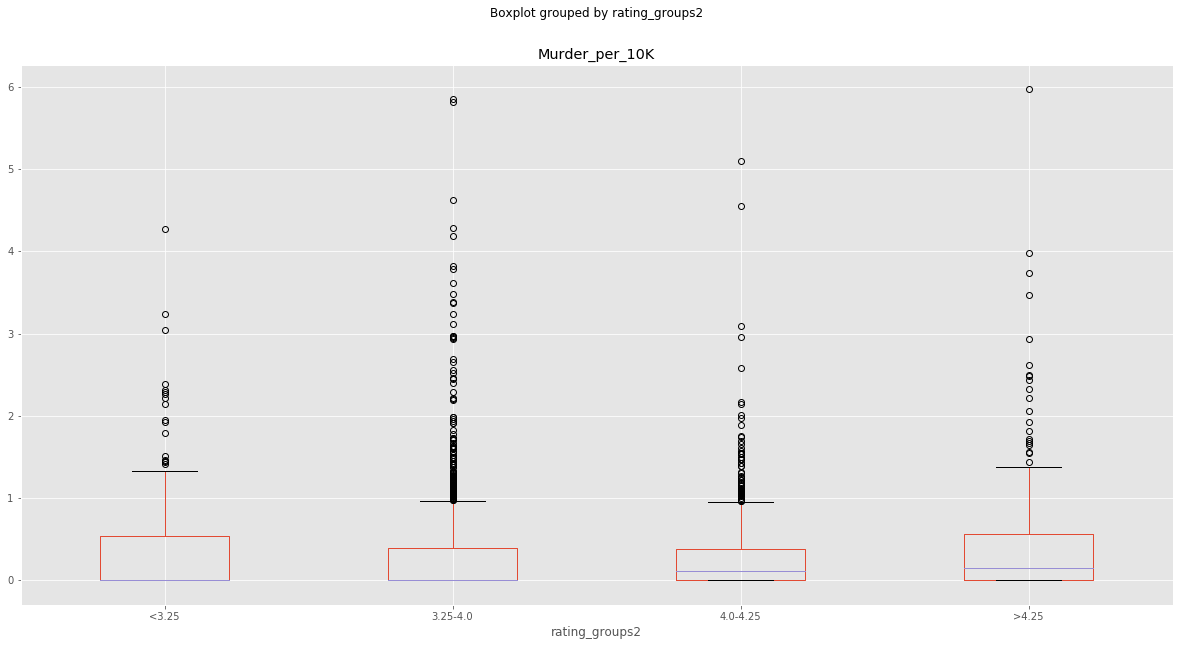

In [47]:
# Use a box polt to show crime rate by avg rating groups
yelptest_df.boxplot("Murder_per_10K", by="rating_groups2", figsize=(20, 10))
plt.savefig("img_murder_box.png")
plt.show()

### MV Theft

In [23]:
# Create a dictionary of groups by avg restaurant ratings and preform ANOVA
dic5 = {}
groups = list (yelptest_df["rating_groups2"].unique())
for grouping in groups:
    dic5['{0}'.format(grouping)] = yelptest_df.loc[yelptest_df["rating_groups2"]==grouping,"MV_Theft_per_10K"]

print(stats.f_oneway(dic5["<3.25"], dic5["3.25-4.0"],dic5["4.0-4.25"],dic5[">4.25"]))

F_onewayResult(statistic=36.95832471519387, pvalue=1.838260587168992e-23)


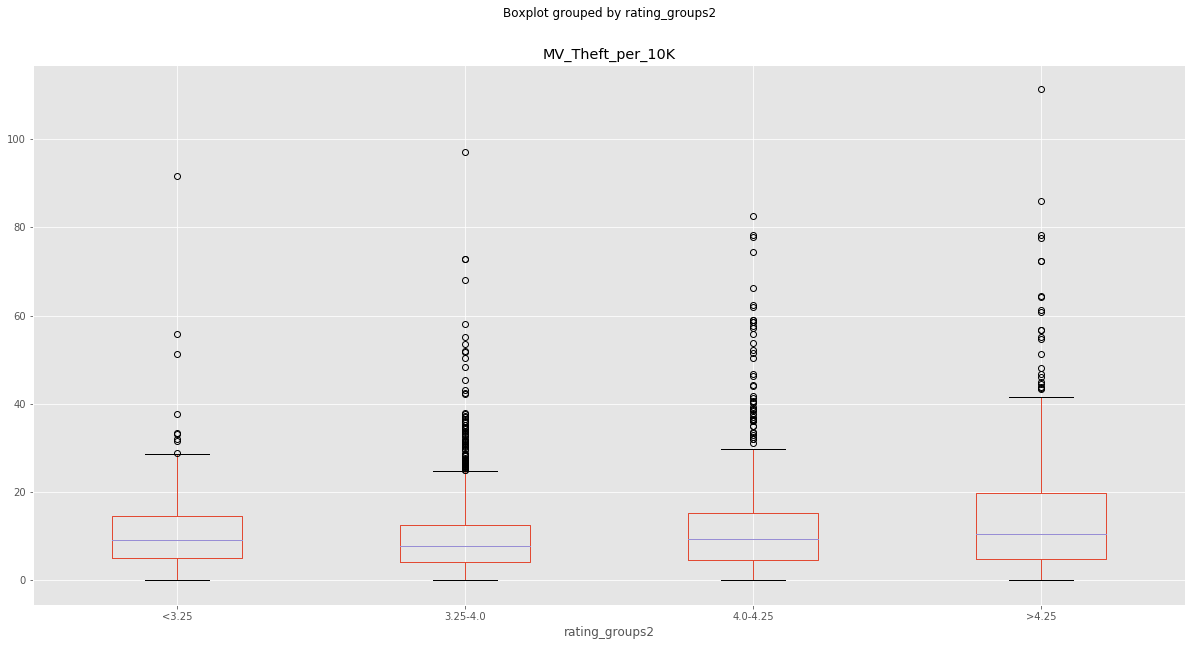

In [48]:
# Use a box polt to show crime rate by avg rating groups
yelptest_df.boxplot("MV_Theft_per_10K", by="rating_groups2", figsize=(20, 10))
plt.savefig("img_theft_box.png")
plt.show()

### Larceny

F_onewayResult(statistic=77.02743297049108, pvalue=4.6858070950656695e-48)


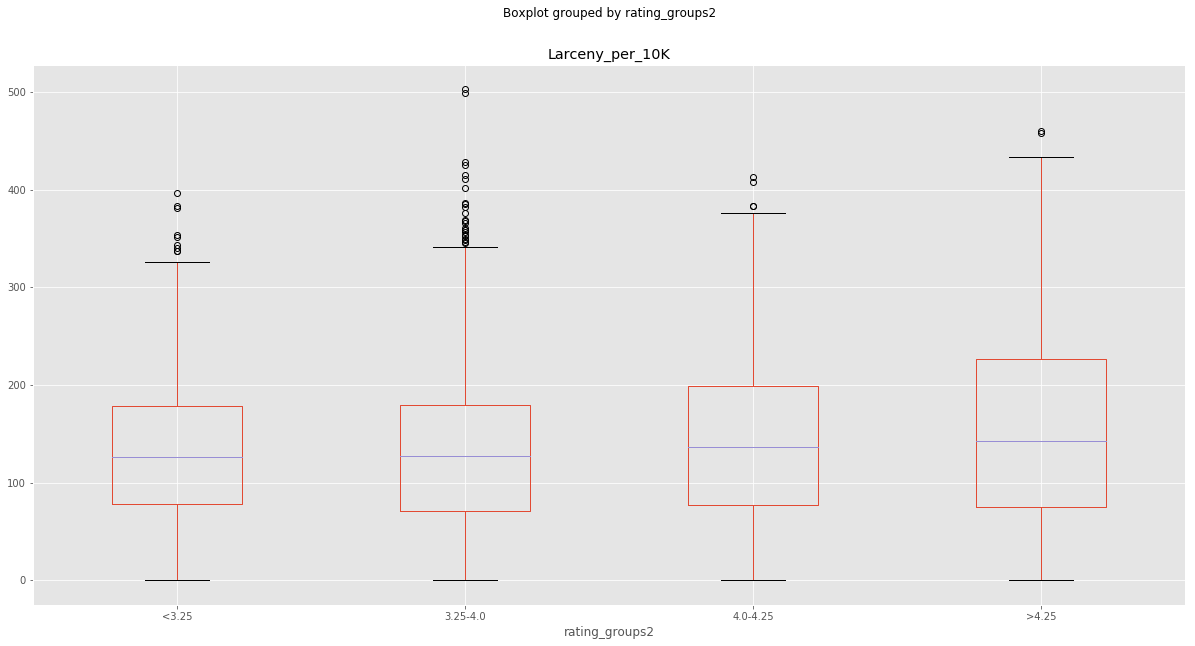

In [55]:
# Create a dictionary of groups by avg restaurant ratings and preform ANOVA
dic6 = {}
groups = list (yelptest_df["rating_groups2"].unique())
for grouping in groups:
    dic6['{0}'.format(grouping)] = yelptest_df.loc[yelptest_df["rating_groups2"]==grouping,"Larceny"]

print(stats.f_oneway(dic6["<3.25"], dic6["3.25-4.0"],dic6["4.0-4.25"],dic6[">4.25"]))

# Use a box polt to show crime rate by avg rating groups
yelptest_df.boxplot("Larceny_per_10K", by="rating_groups2", figsize=(20, 10))
plt.savefig("img_larceny_box.png")
plt.show()

### Burglary

F_onewayResult(statistic=68.60394217417092, pvalue=5.9466225616153934e-43)


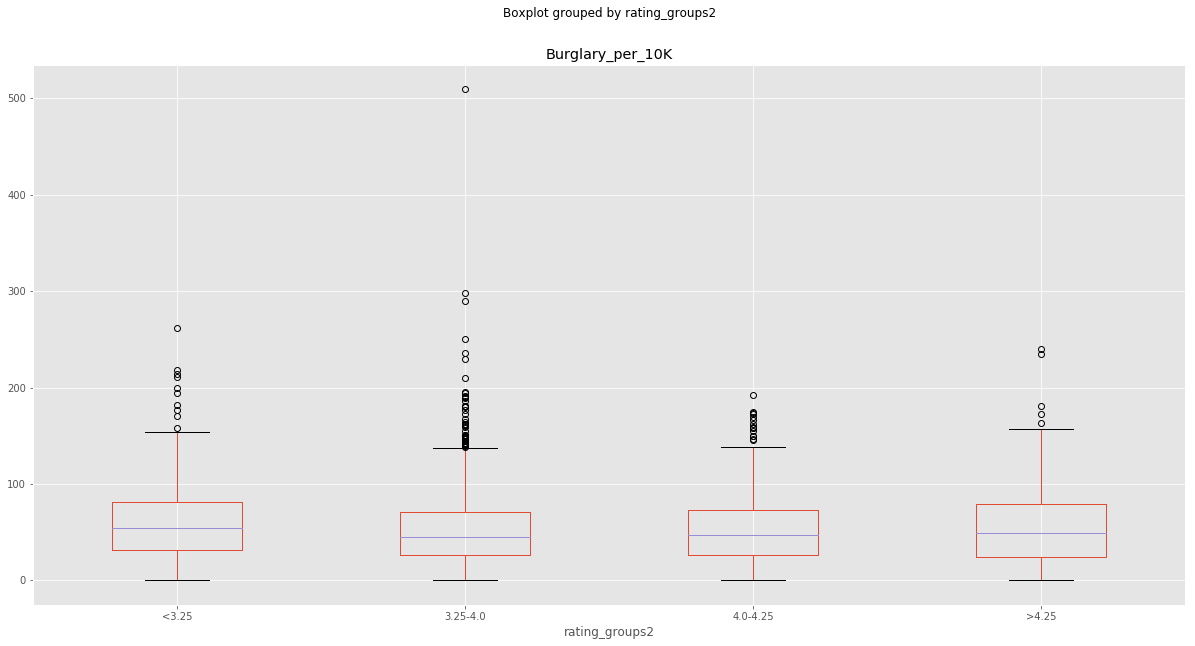

In [56]:
# Create a dictionary of groups by avg restaurant ratings and preform ANOVA
dic6 = {}
groups = list (yelptest_df["rating_groups2"].unique())
for grouping in groups:
    dic6['{0}'.format(grouping)] = yelptest_df.loc[yelptest_df["rating_groups2"]==grouping,"Burglary"]

print(stats.f_oneway(dic6["<3.25"], dic6["3.25-4.0"],dic6["4.0-4.25"],dic6[">4.25"]))

# Use a box polt to show crime rate by avg rating groups
yelptest_df.boxplot("Burglary_per_10K", by="rating_groups2", figsize=(20, 10))
plt.savefig("img_burglary_box.png")
plt.show()

In [ ]:
### Robb